# Basic logic regression
## Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Apply a fix to the statsmodels library
# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load data

In [2]:
raw_data = pd.read_csv('./basic-logic-regression.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [5]:
y = data['Admitted']
x1 = data['SAT']

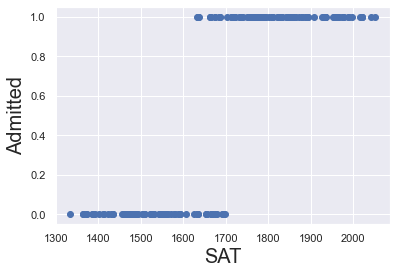

In [6]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a regression line

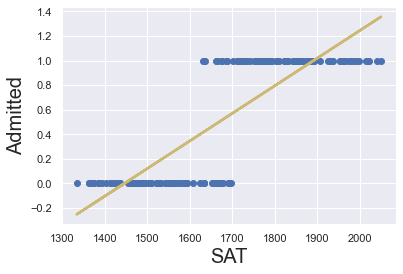

In [7]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y, x)
results_lin = reg_lin.fit()

plt.scatter(x1, y, color='C0')
y_hat = x1 * results_lin.params[1] + results_lin.params[0]

plt.plot(x1, y_hat, lw=2.5, color='C8')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


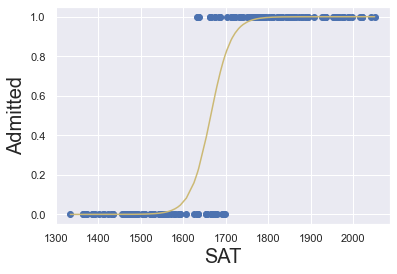

In [8]:
reg_log = sm.Logit(y, x)
results_log = reg_log.fit()

def f(x, b0, b1):
    return np.array(np.exp(b0 + x * b1) / (1 + np.exp(b0 + x * b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 28 Jan 2021   Pseudo R-squ.:                  0.7992
Time:                        10:33:44   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## $log(\frac{\pi}{1-\pi}) = -69.91 + 0.042 * SAT$